# Proyecto de EDA  y Clasificación usando datos de Kaggle: Analisis de Supervivencia Titanic

# 1. EDA

1. ¿Que preguntas le haremos al dataset? 
2. Carga de datos y primer vistazo
3. Definir los tipos de datos que tenemos
4. Descripción estadística
5. Visualización de los datos
6. Comparación entre variables (Análisis multivariado)
7. Sumarización

## 1.1 ¿Que preguntas le haremos al dataset? 

In [1]:
#¿Cómo es la distribución de la población en hombres y mujeres, clases, edad, supervivientes?
#¿Qué tipo de personas tenían mayor posibilidad de sobrevivir al hundimiento del Titanic?

## 1.2 Carga de datos y primer vistazo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Lectura de datos
train = pd.read_csv("D:/Data_Science/Proyectos/Titanic/train.csv")
test = pd.read_csv("D:/Data_Science/Proyectos/Titanic/test.csv")

In [4]:
#primer vistazo al dataset
print(train.shape)
train.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Obtenemos la siguiente información:
- Hay 891 registros y 12 columnas en total.
- Obtenemos un indicio de los tipos de datos que tenemos.

## 1.3 Definir los tipos de datos

In [5]:
#Tipos de datos del dataframe y numero de datos no nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Obtenemos la siguiente información:
- Datos cualitativos o categóricos:
    - Nominales : "Sex","Embarked", "Cabin", "Ticket" y "Nombre" ya que no pueden ser ordenados o medidos.
        - Binarios : "Survived".  Tipo especial de dato nominal donde solo hay dos valores 1 y 0.
    - Ordinales : "PassengerId" y "Pclass" ya que si existe un orden, el primero existe el orden en el que fueron registrados y el segundo existe el orden de clases.
- Datos cuantitativos o numéricos:                
    - Discretos : "SibSp", "Parch" y "Age" ya que solo adoptan valores enteros.
    - Continuos : "Fare".
- Identificamos que hay columnas con datos nulos como "Age", "Cabin", "Embarked".
- Identificamos también el datatype, cuales son Int, Floats o Strings .

## 1.4 Descripción estadística

### 1.4.1 Datos categóricos 

In [6]:
# Al ser datos categoricos su medida de tendencia central es la moda:
train[["Survived", 'Pclass', 'Sex', 'Cabin', 'Embarked']].mode()

,Survived,Pclass,Sex,Cabin,Embarked
0,0.0,3.0,male,B96 B98,S
1,NaN,NaN,NaN,C23 C25 C27,NaN
2,NaN,NaN,NaN,G6,NaN


In [7]:
# Podemos calcular el promedio de "Survived" ya que al ser binario, el promedio representa la proporcion
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Obtenemos la siguiente información:
- Hubo una tasa de 0.38  de supervivencia.
- La moda de la clase nos indica que la mayoría se concentraba en la 3ra clase.
- La moda del Sexo nos indica que hay más hombres que mujeres.
- La moda de Embarked nos indica que la mayoría de la gente abordó en el puerto Southampton cuando zarpó el Titanic.

### 1.4.2 Datos numéricos

In [8]:
# A continuación los principales Summary Statistics
df1 = train[['SibSp', 'Parch', 'Age', 'Fare']]
df1.describe()

,SibSp,Parch,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.523008,0.381594,29.699118,32.204208
std,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,28.000000,14.454200
75%,1.000000,0.000000,38.000000,31.000000
max,8.000000,6.000000,80.000000,512.329200


Obtenemos la siguiente información:
- La mediana en "SibSp" y "Parch" nos indica que la mayoría de las personas no iba acompañado de familiares.
- La edad promedio es de 29.69 años, cercano a la mediana de 28 años.
- La tarifa del boleto promedio es de 32 dolares aunque la mediana está alejada pues es de 14 dolares. Además tiene una alta std y los percentiles 25 y 75 no están muy alejados por lo que suponemos que hay mucha dispersión y datos extremos que alteran la tendencia.


# 1.5 Visualización de los datos

## 1.5.1 Datos categóricos 

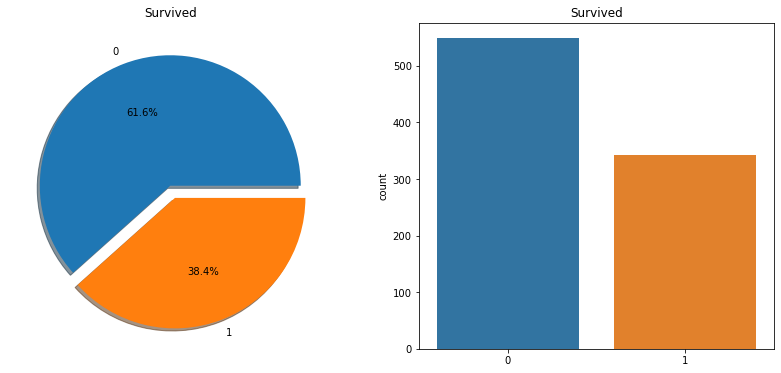

In [9]:
# Solo visualizaremos aquellos datos de interés
# La gráfica más adecuada para estos datos son las gráficas de barras y las de pastel

#Survived
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

#pie chart
train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax1 ,shadow=True)
ax1.set_title('Survived')
ax1.set_ylabel('')

#bar chart
sns.countplot(x = 'Survived',data=train ,ax=ax2)
ax2.set_title('Survived')
ax2.set_xlabel('')
plt.show()

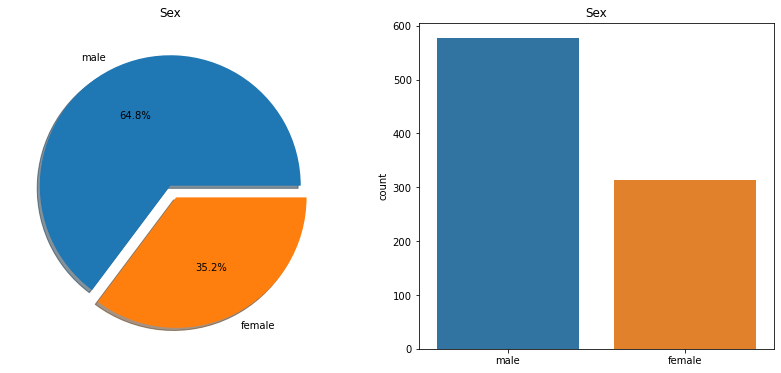

In [10]:
#Genders
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

#pie chart
train['Sex'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax1 ,shadow=True)
ax1.set_title('Sex')
ax1.set_ylabel('')

#bar chart
sns.countplot(x = 'Sex',data=train ,ax=ax2)
ax2.set_title('Sex')
ax2.set_xlabel('')
plt.show()

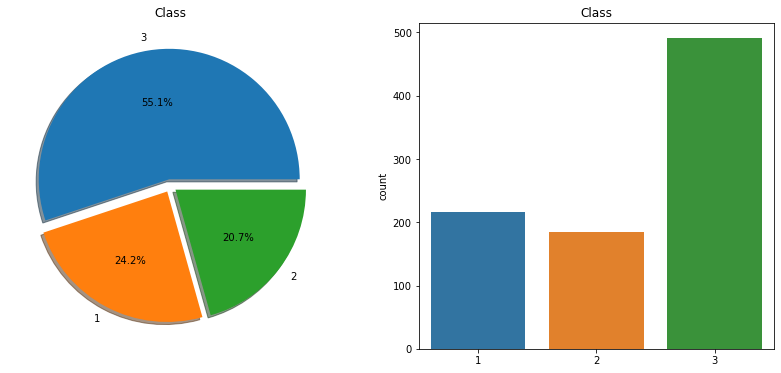

In [11]:
#Classes
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

#pie chart
train['Pclass'].value_counts().plot.pie(explode=[0.05,0.05,0.05], autopct='%1.1f%%', ax=ax1 ,shadow=True)
ax1.set_title('Class')
ax1.set_ylabel('')

#bar chart
sns.countplot(x = 'Pclass',data=train ,ax=ax2)
ax2.set_title('Class')
ax2.set_xlabel('')
plt.show()

Obtenemos la siguiente información:
- Se aprecia de mejor manera cuantos y en que proporción había de sobrevivientes, hombres y mujeres y de que clase provenían.

### 1.5.2 Datos numéricos

Text(0, 0.5, 'Price $')

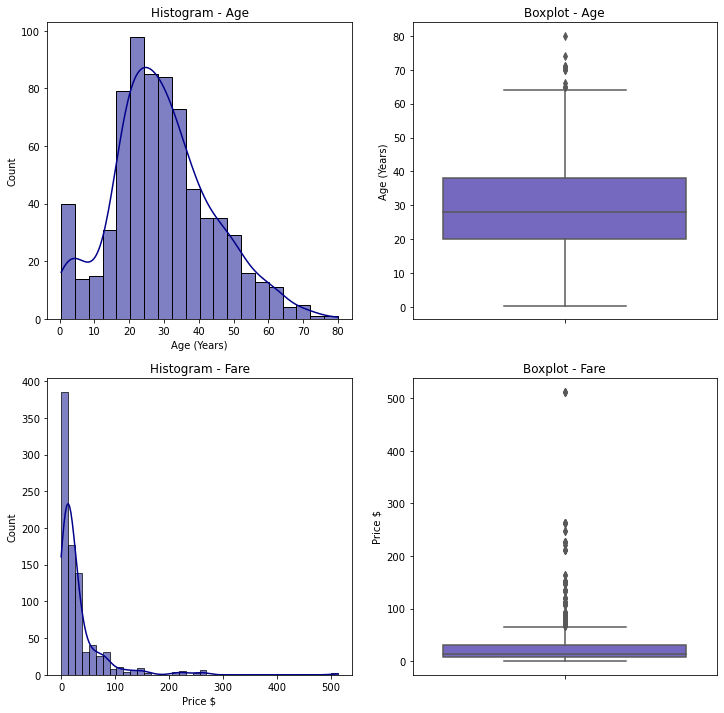

In [12]:
"""
Solo visualizaremos aquellos datos de interés
Las gráficas más adecuadas para esto son los histogramas y gráficas de caja y brazos(boxplot). La primera nos indica su posible
distribución o si hay sesgo a la izquierda o derecha. Mientras que la segunda nos da una mejor visualización sobre la mediana,
una mejor apreciación sobre el sesgo y los datos anómalos.
""" 
#Obtenemos los histogramas y boxplots
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

sns.histplot(ax = ax[0,0], data = train, x ='Age', kde = True, color = 'darkblue')
ax[0,0].set_title('Histogram - Age')
ax[0,0].set_xlabel('Age (Years)')

sns.boxplot(ax = ax[0,1], y = train['Age'], color = 'slateblue')
ax[0,1].set_title('Boxplot - Age')
ax[0,1].set_ylabel('Age (Years)')

sns.histplot(ax = ax[1,0], data = train, x ='Fare', kde = True, color = 'darkblue', bins = 40)
ax[1,0].set_title('Histogram - Fare')
ax[1,0].set_xlabel('Price $')

sns.boxplot(ax = ax[1,1], y = train['Fare'], color = 'slateblue')
ax[1,1].set_title('Boxplot - Fare')
ax[1,1].set_ylabel('Price $')

Obtenemos la siguiente información:
- Hay una tendencia normal en la distribución de la edad con un ligero sesgo hacia la derecha (histograma) por los valores extremos. La mitad de la población se encontraba entre los 20 y 38 años (boxplot).
- En el caso de la tarifa, hay un gran sesgo hacia la derecha (histograma) debido a los valores extremos. Sin embargo, gracias a la gráfica de caja y brazos decimos que el 50% de la población compro su boleto entre 8 y 31 dolares. Y el 95% de la población no gastó más de 100 dolares en el boleto.

## 1.6 Comparación entre variables (Análisis multivariado)

### 1.6.1 Matriz de correlación

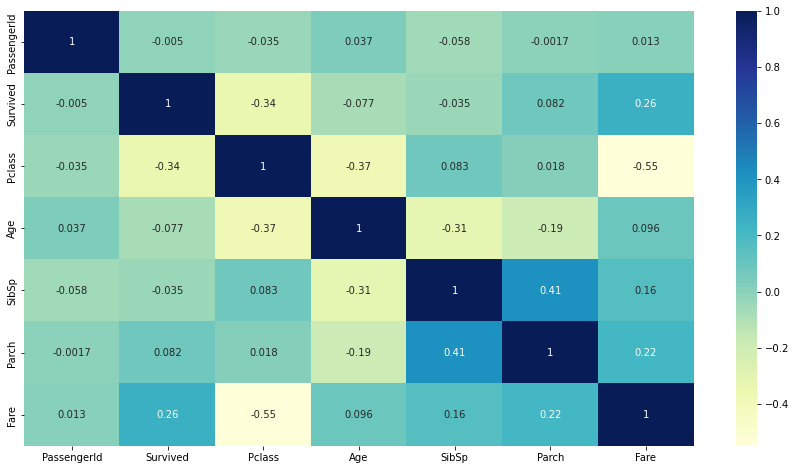

In [13]:
# Elaboraremos una matriz de correlacion para ver en primera instancia si hay una relación entre ciertas variables
fig = plt.figure(figsize = (15,8))
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Obtenemos la siguiente información:
- Las variables más altamente correlacionadas son la de la tarifa "Fare" y "Pclass". Su correlación es negativo pues a mayor tarifa, disminuye el numero de clase (1ra clase) y a menor tarifa aumenta (3ra clase)
- No se visualiza una relación lineal aparente entre variables, sin embargo puede que se relacionen de alguna otra forma y nos daremos cuenta con las siguientes visualizaciones.

### 1.6.2 Comparación de la variable "Survived" con otra variable

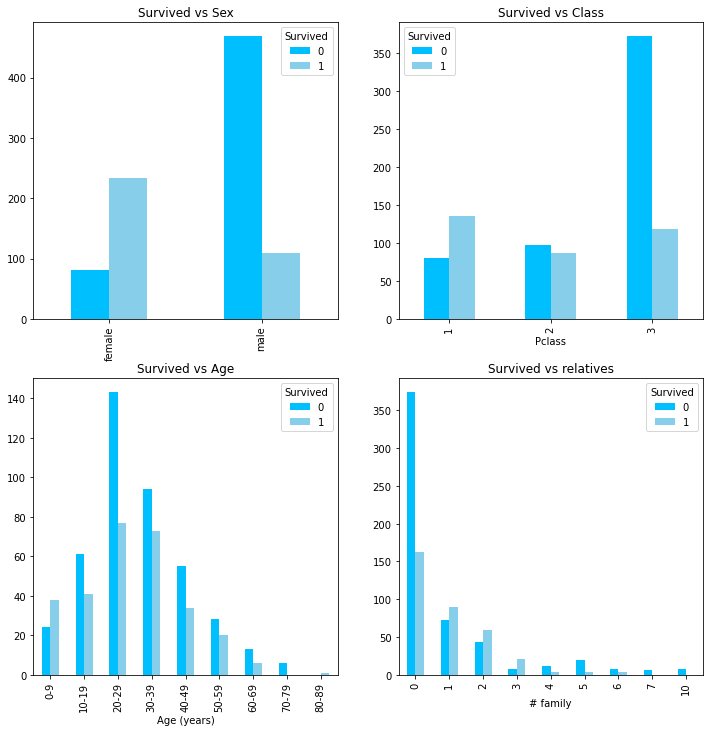

In [14]:
#definimos una nueva columna con los intervalos de edad y otra con el número de familiares
def intervalo(x):
    for i in np.arange(0,81,10):
        if (x >= i) and (x < i+10):
            return str(i)+'-'+str(i+9)
            break
train['Intervalo'] = train['Age'].apply(intervalo)
train['family'] = train['SibSp'] + train['Parch']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

#Survived vs Sex
group_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
group_sex.unstack(level = 0).plot.bar(ax = ax[0,0],color = ['deepskyblue','skyblue'])
ax[0,0].set_title('Survived vs Sex')
ax[0,0].set_xlabel("")
#Survived vs Class
group_class = train.groupby(['Survived', 'Pclass']).count()['PassengerId']
group_class.unstack(level = 0).plot.bar(ax = ax[0,1], color = ['deepskyblue','skyblue'])
ax[0,1].set_title('Survived vs Class')

#Survived vs Age
group_age = train.groupby(['Survived', 'Intervalo']).count()['PassengerId']
group_age.unstack(level = 0).plot.bar(ax = ax[1,0], color = ['deepskyblue','skyblue'])
ax[1,0].set_xlabel('Age (years)')
ax[1,0].set_title('Survived vs Age')

#Survived vs family
group_age = train.groupby(['Survived', 'family']).count()['PassengerId']
group_age.unstack(level = 0).plot.bar(ax = ax[1,1], color = ['deepskyblue','skyblue'])
ax[1,1].set_xlabel('# family')
ax[1,1].set_title('Survived vs relatives')
plt.show()

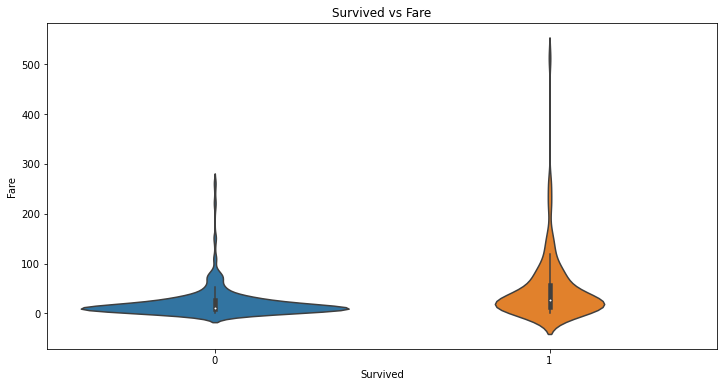

In [15]:
# Survived vs Fare  (variable categórica vs numérica)
fig = plt.figure(figsize = (12,6))
sns.violinplot(x = 'Survived', y = 'Fare', data = train,split = True)
plt.title('Survived vs Fare')
plt.show()

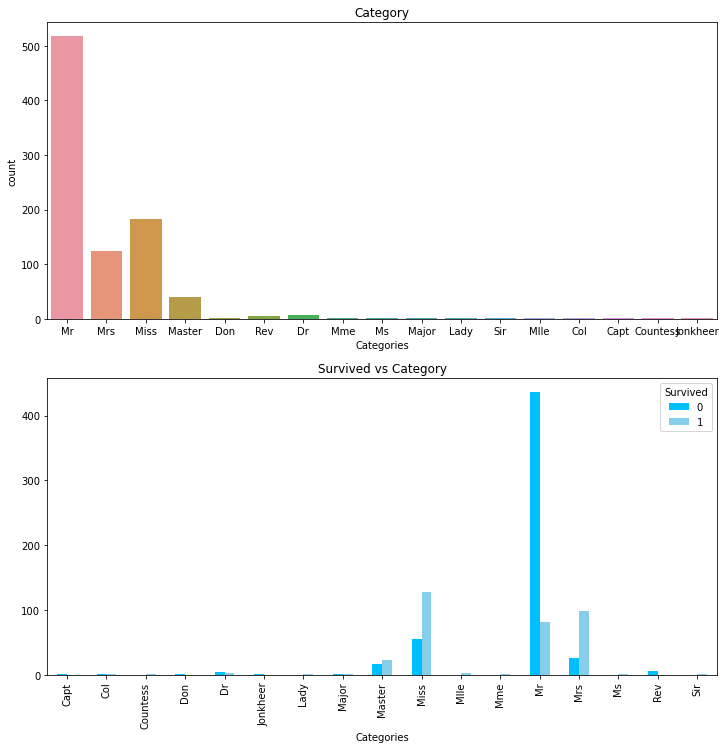

In [16]:
# Survived vs Categories

#Creamos una nueva columna con las categorías que vienen en el nombre
train['Category'] = train['Name'].str.extract(r'([A-Za-z]*)\.')

f, (ax1, ax2)= plt.subplots(nrows = 2, ncols = 1,figsize = (12,12))

sns.countplot(x = "Category", data = train, ax = ax1)
ax1.set_title('Category')
ax1.set_xlabel('Categories')

group_cat = train.groupby(['Survived', 'Category']).count()['PassengerId']
group_cat.unstack(level = 0).plot.bar(ax = ax2, color = ['deepskyblue','skyblue'])
ax2.set_xlabel('Categories')
ax2.set_title('Survived vs Category')
plt.show()

Obtenemos la siguiente información:
- De la gráfica "Survived vs Sex" podemos ver que la proporción de sobrevivientes es mayor en el caso de mujeres.
- De la gráfica "Survived vs Class" podemos ver que la proporción de sobrevivientes es mayor en el caso de los de 1ra clase, los de 2da es más equitativo y los de 3ra la mayoría no sobrevivieron.
- De la gráfica "Survived vs Age" podemos ver que la proporción de sobrevivientes es mayor solo para los niños menores a 10 años y adultos mayores a 80. Del resto hubo más muertes.
- De la gráfica "Survived vs relatives" visualizamos que las personas que no tenían un familiar abordo fallecieron en mayor proporción. También los que iban con más de 5 familiares fallecieron en mayor proporción.
- De la gráfica "Survived vs Fare" visualizamos que la gente que compró una tarifa más barata falleció en mayor proporción. Además de que a partir de la tarifa de $300 no hubo ninún fallecido.
- De la gráfica "Survived vs Category" vemos que la proporción de fallecidos con pseudónimo Mr es mucho mayor al resto de categorías, donde Mr suele ser asociado a caballeros. Vemos nuevamente que para mujeres (con psudonimo Miss o Mrs) hay mayor tasa de sobrevivientes. También vemos que el grado de educación como Dr o Master aumenta un poco la proporción de sobrevivientes.

- Lo anterior da indicio a explorar el comportamiento de más de una variable a la vez contra "Survived"

### 1.6.3 Comparación de la variable "Survived" con más de una variable¶

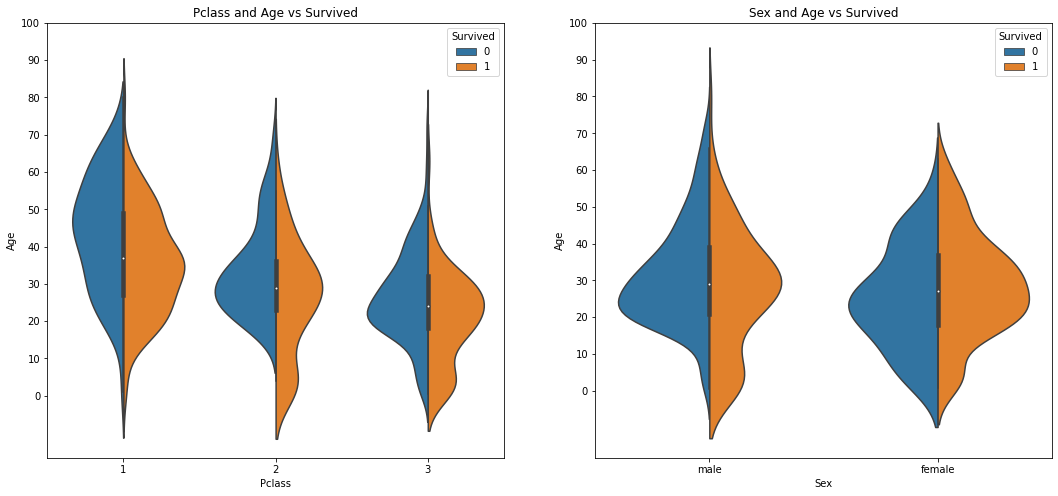

In [17]:
#Comparando más de una variable a la vez con "Survived"
f,ax=plt.subplots(1,2,figsize=(18,8))

#Pclass and Age vs Survived
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

#Sex and Age vs Survived
sns.violinplot(x ="Sex",y = "Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Obtenemos la siguiente información:
- De la gráfica "Pclass and Age vs Survived" la concentración de sobrevivientes por cada clase y edad, vemos que independientemente de la clase, hay mayor probabilidad de sobrevivir siendo niño menor a 15 años. Despues de ello varía en cada clase, para la primera clase hay una mayor cantidad de sobrevivientes de los 20 a los 40 años. Después de ello sigue la tendencia de las otras dos clases, menos sobrevivientes
- De la gráfica "Sex and Age vs Survived" podemos ver que si eres hombre menor a 10 años tienes mayores probabilidades de sobrevivir que siendo mujer, después de esa edad hay más sobrevivientes mujeres en proporción al total de mujeres, que sobrevivientes hombres en proporcion al total de hombres.

## 1.7 Sumarización

- El dataset presenta rangos nulos en la edad el cual se puede arreglar con la imputación de la mediana de las edades.
- Hubo más muertos que sobrevivientes (solo el 38.4 % sobrevivió).
- La mayoría de la población eran hombres jovenes y de mediana edad (de 20 a 40 años).
- La mayoría de las personas era de la 3ra clase (casi 2/3 de la población total).
- Hay valores extremos en variables como la edad y la tarifa del boleto.
- Las principales variables relacionadas con la supervivencia son el sexo, la clase y la edad en conjunto ya que hay ciertos rangos de edades donde es más probable sobrevivir (edades menores a 15 años) y más si eres mujer o de primera clase.
- Se pueden considerar otras variables con la supervivencia como el número de familiares con el que ibas a bordo, ya que los que llevaban de 2 a 3 familiares tenían una mayor tasa de supervivencia que los que iban solos o con mas de 5 familiares.


Encontramos entonces las posibles características correlacionadas, esto nos servirá para el preprocesamiento de datos y desarrollo de un modelo de calsificación de Machine Learning.
Aunque hay que planificar como vamos a realizar el tratamiento de los datos nulos en la edad y de sus outliers, además de pasar a valores numéricos ciertas variables como "Sex" para que puedan ser entrenadas ya que Sklearn solo acepta variables numéricas.


# 2. Preprocesamiento

De acuerdo al EDA anterior, encontramos que las siguientes variables están relacionadas con la supervivencia:
- Sex
- Age
- Pclass

In [18]:
#Cambio de los datos de sexo a números
train['Sex'].replace(['female','male'], [0,1], inplace = True)
#test['Sex'].replace(['female','male'], [0,1], inplace = True)

In [19]:
"""
Tratamos los datos nulos para la columna "Age"
Para ello imputamos la Mediana estadística que en este caso es de 28 años.
La media no ya que en el EDA visualizamos que la edad tiene una distribución sesgada a la derecha.
"""
train['Age'] = train['Age'].fillna(28.0)
train['Intervalo'] = train['Age'].apply(intervalo)

In [20]:
#Mostramos que ya no contamos con datos nulos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Intervalo    891 non-null    object 
 13  family       891 non-null    int64  
 14  Category     891 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [21]:
#En vez de trabajar con la variable 'Age', trabajaremos con los intervalos de edad, asignándole un entero a cada intervalo

intervals = ['0-9', '10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89']
names = [0,1,2,3,4,5,6,7,8]
train['Intervalo'].replace(intervals, names, inplace = True) 

#Hacemos lo mismo para los datos de test
#test['Intervalo'] = test['Age'].apply(intervalo)
#test['Intervalo'].replace(intervals, names, inplace = True) 

In [22]:
# Por último seleccionamos los datos de train y test
X = train[['Sex', 'Intervalo', 'Pclass']]
Y = train['Survived']

In [23]:
X

,Sex,Intervalo,Pclass
0,1,2,3
1,0,3,1
2,0,2,3
3,0,3,1
4,1,3,3
...,...,...,...
886,1,2,2
887,0,1,1
888,0,2,3
889,1,2,1


In [24]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 3. Modelos de Machine Learning

Pondremos a prueba los siguientes algoritmos de clasificación:
- 3.1 Regresión Logística
- 3.2 KNN o K Vecinos más cercanos
- 3.3 Maquinas de vectores de soporte
- 3.4 Naive Bayes
- 3.5 Árbol de decisión
- 3.6 Bosque aleatorio


La métricas que se usarán para evaluar los modelos serán las siguientes:

**Matriz de confusión.** 
Tabla que describe el desempeño de un modelo de clasificación, donde muestra el número correcto e incorrecto de predicciones y a partir de esta se obtienen el resto de las métricas. En una clasificación binaria, una matriz de confusión se ve como la siguiente imagen:

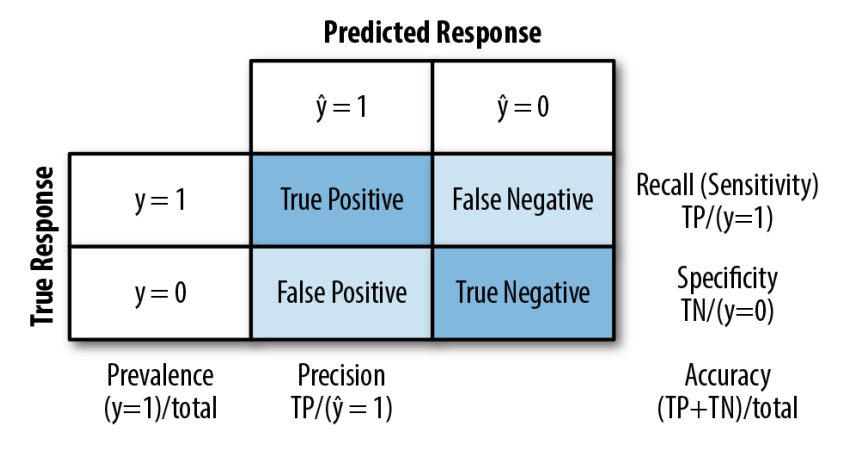
Imagen tomada de:  Peter Bruce, Andrew Bruce, Peter Gedeck. "Practical Statistics for Data Scientist". (2020). O’Reilly Media, Inc. Pag. 222

Donde True Positive ($TR$) son los casos donde el dato real es 1 y la prediccion tambien es 1. False Negative ($FN$) son los casos donde el dato real es 1 y la predicción arrojó 0. False Positive ($FP$) son los casos donde el dato real es 0 y la prediccion arrojó 1. Y True Negative ($TN$) donde el dato real es 0 y la predicción también.

**Exatitud.**
Es el número de predicciones correctas realizadas por el modelo entre el número total de registros y sirve como primera métrica para conocer el rendimiento del modelo:

$$ \dfrac{TP + TN}{Total} $$

**Precisión.**
Es la proporción de los verdaderos positivos y los positivos predichos por el modelo. Ésta métrica capta el error  generado por los Falsos Positivos, a mayor cantidad de falsos positivos, menor será ésta métrica:

$$ \dfrac{TP}{TP + FP}$$

**Sensibilidad.**
Es la proporción de los verdaderos positivos y los positivos reales. Ésta métrica capta el error  generado por los Falsos Negativos, a mayor cantidad de falsos negativos, menor será ésta métrica:

$$ \dfrac{TP}{TP + FN}$$

**Especidad.**
Es el número de predicciones negativas correctas entre el número total de negativos, otra forma de captar el error generado por los Falsos Positivos:

$$ \dfrac{TN}{TN + FP}$$

**F1 Score.**
Es un puntaje que representa las variables de precisión y sensibilidad a la vez, a través de un promedio ponderado:

$$ \dfrac{2 * Precisión * Sensibilidad}{ Precisión + Sensibilidad}$$

**AUC.**
AUC es el área bajo la curva ROC, que es una curva entre la *Sensibilidad* vs la *1-Especidad* del modelo. Cuanto más cercano a 1 sea esta métrica, mejor rendimiento tendrá el clasificador. La peor medida es cuando alcanza el 0.5 y cuando el AUC < 0.5 entonces el modelo está efectuando predicciones invertidas.

*Nota: De las anteriores medidas, sus valores oscilan entre 0 y 1, siendo 1 la mejor medida, aunque puede ser engañosa por lo que se deben comparar varias de éstas métricas a la vez.*


## 3.1 Regresión Logística

La regresión logística es usada para estimar la probabilidad de que una variable pertenezca una clase particular en una categorización binaria. Si la probabilidad es mayor al 50% entonces el modelo predice que esa variable pertenece a dicha clase. Al igual que la regresión lineal, estima la probabilidad de que pertenezca a una clase con una suma ponderada. Dadas las variables predictoras $X_1,...,X_n$, la función de probabilidad está dada por:

$$ p = \dfrac{1}{1+e^{-(\beta_0 + \beta_1X_1 + \cdots \beta_nX_n)}}$$

Donde $\sigma(t) = \frac{1}{1+exp(-t)}$ es la función sigmoide. Entonces el modelo de predicción funciona de la siguiente forma:
$$ \hat{y} = \left\{\begin{matrix}
0 \; si \; p < 0.5 \\ 
1 \; si \; p \geq 0.5
\end{matrix}\right.$$

Para poder predecir p, necesitamos conocer los coeficientes, los cuales, podemos agrupar en un vector $\theta = (\beta_0,...,\beta_n)$. Este vector se obtiene al minimizar una función de costo como en la regresión lineal (en la regresión lineal, la función de costo a minimizar era el MSE), esta función de costo de la regresión logística está dada por:

$$ J(\theta) = -\dfrac{1}{n}\sum_{i=1}^n \left[y^{(i)}log \left( p^{(i)}\right) + \left(1-y^{(i)} \right)log(1-p^{(i)}) \right] $$

In [35]:
#Separamos los datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

#Definimos el modelo
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Entrenamos el modelo
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

#métricas del modelo
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
accuracy_logreg = accuracy_score(Y_test,Y_pred)  #exactitud
precision_logreg = precision_score(Y_test,Y_pred) #precisión
recall_logreg = recall_score(Y_test,Y_pred)  #sensibilidad
F1_logreg = f1_score(Y_test,Y_pred) # F1
auc_logreg = roc_auc_score(Y_test,Y_pred) #AUC

In [36]:
#Imprimimos las métricas
print(f'La exactitud del modelo: {accuracy_logreg}')
print()
print(f'La precisión del modelo: {precision_logreg}')
print()
print(f'La sensibilidad del modelo: {recall_logreg}')
print()
print(f'Score F1 del modelo: {F1_logreg}')
print()
print(f'El área bajo la curva ROC (AUC): {auc_logreg}')
print()

La exactitud del modelo: 0.7988826815642458

La precisión del modelo: 0.7887323943661971

La sensibilidad del modelo: 0.7272727272727273

Score F1 del modelo: 0.7567567567567568

El área bajo la curva ROC (AUC): 0.7901069518716577



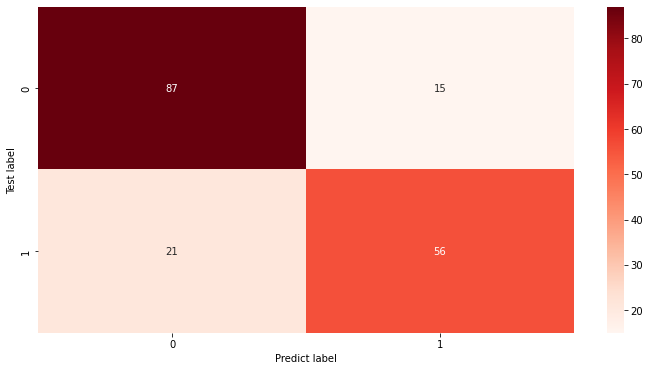

In [37]:
#Graficamos matriz de confusión
from sklearn.metrics import confusion_matrix
confm_logreg  = confusion_matrix(Y_test,Y_pred) #matriz de confusión
df_cm = pd.DataFrame(confm_logreg)

fig = plt.figure(figsize = (12,6))
heatmap = sns.heatmap(df_cm, cmap = 'Reds', annot = True)
heatmap.set(xlabel = 'Predict label', ylabel ='Test label' )
plt.show()

Información obtenida:
- El modelo obtuvo métricas aceptables, la exactitud del modelo indica que casi el 80% de los valores de prueba fueron predichos correctamente. En cuanto a las métricas de Precisión y Sensibilidad, la que más nos interesa que sea cercana a 1 es la de Precisión, que es la que indica la cantidad de Falsos Positvos, ya que es más grave que el modelo se equivoque al predecir que una persona va a sobrevivir cuando la realidad es que no. En este caso la presición es del 78% por lo que para este escenario de predecir si una persona sobrevivirá o no, es muy bajo. Del resto de métricas habrá que compararlas con el resto de modelos, pero hasta ahora pueden considerarse algo bajas.

## 3.2 KNN o K vecinos más cercanos

Es un algoritmo que clasifica un registro de acuerdo a que tan similar es con el resto de registros de una clase particular. Para ello sigue lo siguientes pasos:
1. Encuentra K registros que tienen características similares
2. Para la clasificación encuentra la clase que tenga mayor número de registros de los K registros totales.
3. Para el caso de regresión, calcula el promedio de los registros similares y emplea ese valor en la predicción.

Para saber que tan cerca está un registro de otro se utilizan medidas como la distancia euclidiana $\sqrt{\sum_{i=1}^k (x_i - y_i)^2}$. Otra común es la distancia de Manhattan $\sum_{i=1}^k |x_i - y_i|$.

Para saber el número K apropiado para el modelo, como tal, no hay una regla exacta ya que depende de la naturaleza de los datos. Sin embargo se tiene la tendencia de que valores demasiado pequeños de K generan sobreajuste, mientras que para valores altos de K, corremos el riesgo de que se suavise la diferencia entre clases al haber tantos vecinos, lo que dificultaría la predicción del modelo. Los valores de K caen tipicamente entre 1 y 20 y se recomienda además que el número K sea impar cuando la clasificiación sea binaria, esto para evitar empates.


In [55]:
#Separamos los datos de prueba y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

#Definimos el modelo
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors te permite seleccionar el número K de vecinos
                                            #por default trabaja con la métrica Euclidiana pero se puede modificar a otra

#Entrenamos el modelo
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

#métricas del modelo
accuracy_knn = accuracy_score(Y_test,Y_pred)  #exactitud
precision_knn = precision_score(Y_test,Y_pred) #precisión
recall_knn = recall_score(Y_test,Y_pred)  #sensibilidad
F1_knn = f1_score(Y_test,Y_pred) # F1
auc_knn = roc_auc_score(Y_test,Y_pred) #AUC

In [56]:
#Imprimimos las métricas
print(f'La exactitud del modelo: {accuracy_knn}')
print()
print(f'La precisión del modelo: {precision_knn}')
print()
print(f'La sensibilidad del modelo: {recall_knn}')
print()
print(f'Score F1 del modelo: {F1_knn}')
print()
print(f'El área bajo la curva ROC (AUC): {auc_knn}')
print()

La exactitud del modelo: 0.8379888268156425

La precisión del modelo: 0.8028169014084507

La sensibilidad del modelo: 0.7916666666666666

Score F1 del modelo: 0.7972027972027971

El área bajo la curva ROC (AUC): 0.8304127725856696



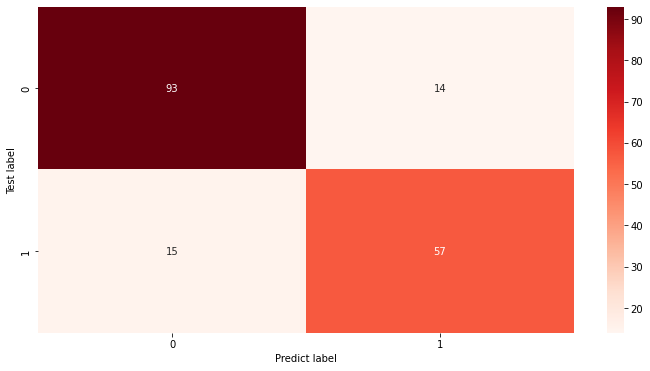

In [57]:
#Graficamos matriz de confusión
confm_knn  = confusion_matrix(Y_test,Y_pred) #matriz de confusión
df_cm = pd.DataFrame(confm_knn)

fig = plt.figure(figsize = (12,6))
heatmap = sns.heatmap(df_cm, cmap = 'Reds', annot = True)
heatmap.set(xlabel = 'Predict label', ylabel ='Test label' )
plt.show()

Información obtenida:
- Al probar con diferentes K, se obtuvieron las mejores métricas con K=3. Para K más grandes y pequeñas se entorpecía el modelo. La exactitud y precisión del modelo están ligeramente por encima del 80% por lo que se consideran regulares. Además, la métrica F1 sigue manteniendose alrededor del 80% por lo que se sigue manteniendo la armonía del promedio entre la sensibilidad y la precisión. Sin embargo, seguiremos comparando con el resto de modelo para obtener las mejores predicciones.

## 3.3 Maquinas de Vectores de Soporte

Al igual que el algoritmo de regresión. EL SVM de clasificación, genera un hiperplano mejor divide a los datos en sus diversas categorías, apoyándose bandas llamadas vectores de soporte, que se trazan a partir de los puntos de las clases que están más cercanos al hiperplano como se muestra en la siguiente imagen:
<img src="SVM1.png" width="500" height="340">
Se le llaman de soportes ya que apoyan al modelo a determinar si una instancia pertenece a una clase o no. 